In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [3]:
dataframe = pd.read_csv('C:\\Users\\fgene\\OneDrive\\Documents\\GlobularCluster.csv')

In [4]:
dataset = dataframe.copy()
dataset.tail()

,GalacticLong,GalacticLat,Rsol,RGC,Metal,Mv,CoreRadius,TidalRadius,Conc,logT,logRho,S0,Vesc,VHB,EBV,BV,Ellipt,Vt,CSB
142,53.37,-35.77,11.9,10.9,-1.8,-9.1,1.2,56.4,1.8,8.4,4.0,9.0,37.1,16.1,0.0,0.8,6.3,6,7.2
143,27.18,-46.84,7.2,7.2,-2.2,-7.2,0.2,33.4,2.4,6.6,5.3,5.2,23.8,15.1,0.1,0.7,7.3,2,6.3
144,30.51,-47.68,19.4,16.0,-1.1,-4.8,2.7,60.4,1.5,8.4,1.4,1.0,4.0,17.1,0.0,0.9,11.7,1,12.9
145,87.10,-42.70,24.4,25.7,-1.0,-3.3,2.7,27.0,0.9,8.3,1.2,0.8,2.7,17.7,0.1,1.0,13.8,0,13.5
146,53.39,-63.48,19.1,18.7,-1.8,-5.0,4.5,42.0,1.1,8.8,1.1,1.1,4.1,17.0,0.0,0.7,11.4,3,13.1


In [5]:
dataset.isna().sum()

GalacticLong     0
GalacticLat      0
Rsol             0
RGC              1
Metal           13
Mv               0
CoreRadius       0
TidalRadius      0
Conc            31
logT             0
logRho           0
S0               0
Vesc             0
VHB              0
EBV              0
BV              13
Ellipt           0
Vt               0
CSB              1
dtype: int64

In [6]:
dataset = dataset.dropna()

In [7]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

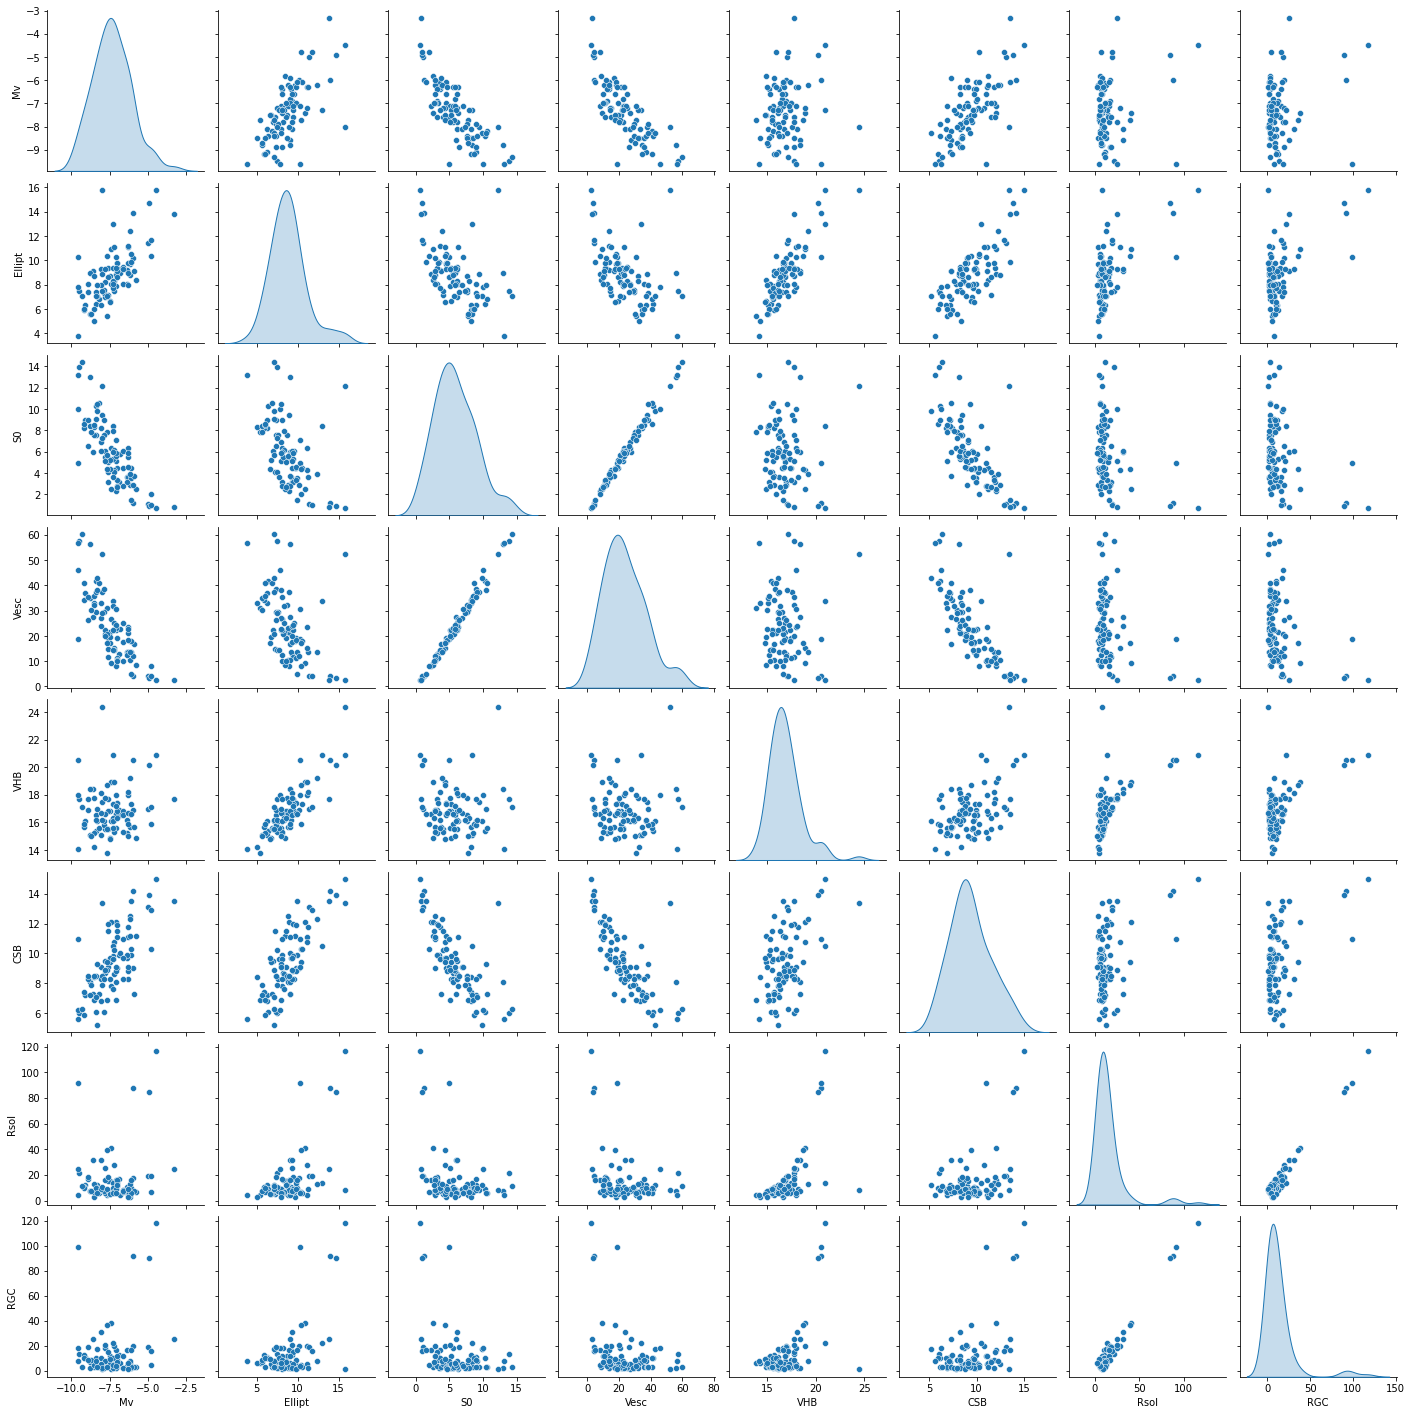

In [11]:
sns.pairplot(train_dataset[['Mv', 'Ellipt', 'S0', 'Vesc','VHB', 'CSB', 'Rsol', 'RGC']], diag_kind='kde')

In [9]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
GalacticLong,90.0,169.576000,148.724545,0.07,16.3925,160.84,330.190,358.92
GalacticLat,90.0,0.386333,30.972702,-89.38,-15.7675,-3.22,10.675,79.76
Rsol,90.0,15.250000,19.056611,2.60,6.8250,9.25,15.800,116.40
RGC,90.0,13.125556,20.474975,0.90,3.2000,6.65,14.475,117.90
Metal,90.0,-1.407778,0.521930,-2.20,-1.8000,-1.60,-1.025,-0.10
Mv,90.0,-7.347778,1.239629,-9.60,-8.1750,-7.35,-6.450,-3.30
CoreRadius,90.0,1.967778,2.551132,0.10,0.5000,1.00,2.000,12.00
TidalRadius,90.0,44.292222,38.719839,6.50,21.9000,33.65,55.425,284.80
Conc,90.0,1.521111,0.421206,0.70,1.2000,1.50,1.800,2.50
logT,90.0,8.132222,0.772538,6.30,7.5000,8.15,8.600,10.10


In [10]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Mv')
test_labels = test_features.pop('Mv')

In [11]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
GalacticLong,169.576000,148.724545
GalacticLat,0.386333,30.972702
Rsol,15.250000,19.056611
RGC,13.125556,20.474975
Metal,-1.407778,0.521930
Mv,-7.347778,1.239629
CoreRadius,1.967778,2.551132
TidalRadius,44.292222,38.719839
Conc,1.521111,0.421206
logT,8.132222,0.772538


In [12]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [13]:
normalizer.adapt(np.array(train_features))

In [14]:
print(normalizer.mean.numpy())

[[169.576   0.386  15.25   13.126  -1.408   1.968  44.292   1.521   8.132
    3.586   5.892  23.731  16.828   0.337   1.172   8.828   4.822   9.374]]


In [15]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 35.16 -32.68  17.    12.7   -1.6    1.8   43.1    1.5    8.4    2.7
    3.2   12.7   16.9    0.     0.8    9.3    2.     9.9 ]]

Normalized: [[-0.91 -1.07  0.09 -0.02 -0.37 -0.07 -0.03 -0.05  0.35 -0.66 -0.88 -0.83
   0.04 -0.77 -0.76  0.21 -1.04  0.24]]


In [16]:
Ellipt = np.array(train_features['Ellipt'])

Ellipt_normalizer = layers.Normalization(input_shape=[1,], axis=None)
Ellipt_normalizer.adapt(Ellipt)

In [17]:
Ellipt_model = tf.keras.Sequential([
    Ellipt_normalizer,
    layers.Dense(units=1)
])

Ellipt_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [18]:
Ellipt_model.predict(Ellipt[:10])

array([[-0.148],
       [-0.117],
       [-0.023],
       [-0.652],
       [ 0.795],
       [-0.306],
       [-0.714],
       [-0.274],
       [-0.086],
       [ 0.763]], dtype=float32)

In [19]:
Ellipt_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [20]:
%%time
history = Ellipt_model.fit(
    train_features['Ellipt'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 2.49 s


In [21]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.678767,0.772009,95
96,0.676999,0.769807,96
97,0.679287,0.767074,97
98,0.677958,0.765809,98
99,0.675994,0.765372,99


In [22]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss', color='#1625B8')
  plt.plot(history.history['val_loss'], label='val_loss',color ='#FF5612' )
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Mv]')
  plt.legend()
  plt.grid(True)

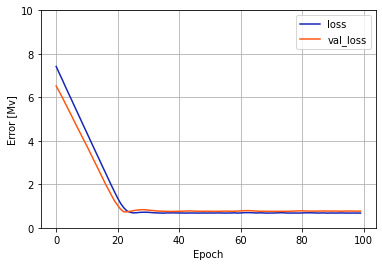

In [23]:
plot_loss(history)

In [24]:
test_results = {}

test_results['Ellipt_model'] = Ellipt_model.evaluate(
    test_features['Ellipt'],
    test_labels, verbose=0)

In [25]:
x = tf.linspace(0.0, 30, 31)
y = Ellipt_model.predict(x)

In [26]:
def plot_Ellipt(x, y):
  plt.scatter(train_features['Ellipt'], train_labels, label='Data', color ='#5458FF')
  plt.plot(x, y, color='#000A45', label='Predictions')
  plt.xlabel('Ellipt')
  plt.ylabel('Mv')
  plt.legend()

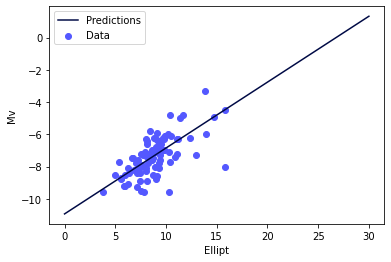

In [27]:
plot_Ellipt(x, y)

In [28]:
#####################################
#Linear regression with multiple inputs
#####################################

In [29]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [30]:
linear_model.predict(train_features[:10])

array([[ 0.958],
       [ 1.031],
       [-1.824],
       [ 1.011],
       [-0.135],
       [ 0.691],
       [ 0.659],
       [-0.486],
       [ 1.91 ],
       [-0.296]], dtype=float32)

In [31]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(18, 1) dtype=float32, numpy=
array([[-0.091],
       [-0.197],
       [ 0.338],
       [ 0.398],
       [-0.269],
       [-0.501],
       [ 0.095],
       [ 0.025],
       [-0.094],
       [ 0.326],
       [-0.434],
       [ 0.133],
       [ 0.468],
       [-0.225],
       [ 0.146],
       [ 0.456],
       [-0.377],
       [-0.326]], dtype=float32)>

In [32]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [33]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 2.58 s


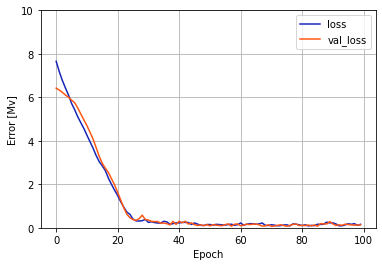

In [34]:
plot_loss(history)

In [35]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [36]:
#####################################
#Regression with a deep neural network (DNN)
###################################

In [37]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [38]:
dnn_Ellipt_model = build_and_compile_model(Ellipt_normalizer)

In [39]:
dnn_Ellipt_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [40]:
%%time
history = dnn_Ellipt_model.fit(
    train_features['Ellipt'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

Wall time: 2.61 s


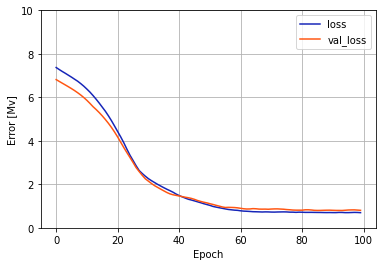

In [41]:
plot_loss(history)

In [42]:
x = tf.linspace(0.0, 30, 31)
y = dnn_Ellipt_model.predict(x)

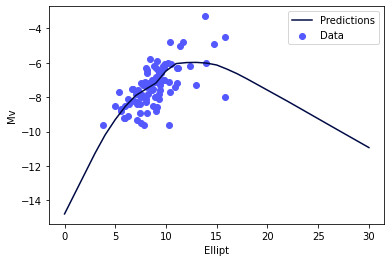

In [43]:
plot_Ellipt(x, y)

In [44]:
##########################
#Regression using a DNN and multiple inputs
#################################

In [45]:
test_results['dnn_Ellipt_model'] = dnn_Ellipt_model.evaluate(
    test_features['Ellipt'], test_labels,
    verbose=0)

In [46]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 18)               37        
 n)                                                              
                                                                 
 dense_5 (Dense)             (None, 64)                1216      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,478
Trainable params: 5,441
Non-trainable params: 37
_________________________________________________________________


In [47]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

Wall time: 2.73 s


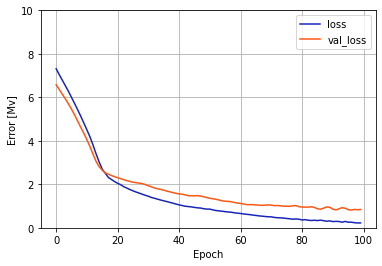

In [48]:
plot_loss(history)

In [49]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [50]:
pd.DataFrame(test_results, index=['Mean absolute error [Mv]']).T

,Mean absolute error [Mv]
Ellipt_model,0.868255
linear_model,0.119982
dnn_Ellipt_model,0.854305
dnn_model,0.784164


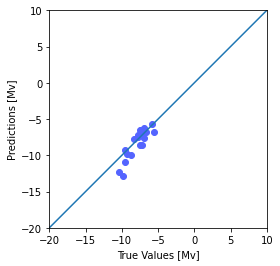

In [55]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal',)
plt.scatter(test_labels, test_predictions, color ='#5464FF')
plt.xlabel('True Values [Mv]')
plt.ylabel('Predictions [Mv]')
lims = [-20, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [56]:
dnn_model.predict(test_features[:10])

array([[ -7.209],
       [ -9.286],
       [-12.326],
       [ -6.284],
       [ -7.584],
       [ -6.785],
       [ -6.472],
       [ -9.99 ],
       [-10.883],
       [ -6.385]], dtype=float32)

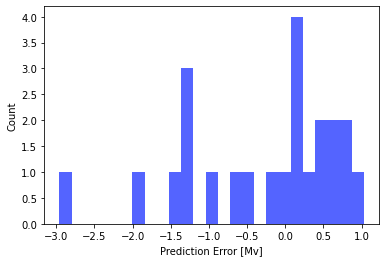

In [57]:
error = test_predictions - test_labels
plt.hist(error, bins=25, color ='#5464FF')
plt.xlabel('Prediction Error [Mv]')
_ = plt.ylabel('Count')